<a href="https://colab.research.google.com/github/rthakkarr1/Isreal-Palestine-data-analysis-1/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
print(data.head())


Saving reddit_opinion_PSE_ISR1.csv to reddit_opinion_PSE_ISR1.csv
                                      post_self_text  Unnamed: 1  Unnamed: 2  \
0                                                NaN         NaN         NaN   
1                                                NaN         NaN         NaN   
2                                                NaN         NaN         NaN   
3  So, it took two months but Hamas's sex crimes ...         NaN         NaN   
4                                                NaN         NaN         NaN   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  


In [ ]:
# Assuming 'data' is your DataFrame
print(data.head(30
                ))  # Print the first ten lines (first five and next five)


                                                 post  \
0                                                       
1                                                       
2                                                       
3   So, it took two months but Hamas's sex crimes ...   
4                                                       
5   So, it took two months but Hamas's sex crimes ...   
6                                                       
7                                                       
8   \nCurious...I ask you, do you believe that the...   
9   So, it took two months but Hamas's sex crimes ...   
10                                                      
11  Why are they going after them? Or are they all...   
12  I noticed that most pro-Palestinians are very ...   
13  So, it took two months but Hamas's sex crimes ...   
14                                                      
15  Tweet Shows Palestinian Cause Is a Colonial Ca...   
16  https://www.timesofisrael.c

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data = data[['post_self_text']].rename(columns={'post_self_text': 'post'})

data['post'] = data['post'].fillna('')
data['post_processed'] = data['post'].apply(lambda x: str(x).lower())
data['post_processed'] = data['post_processed'].apply(lambda x: word_tokenize(x))
data['post_processed'] = data['post_processed'].apply(lambda x: [word for word in x if word.isalnum()])
stop_words = set(stopwords.words('english'))
data['post_processed'] = data['post_processed'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
porter = PorterStemmer()
data['post_processed'] = data['post_processed'].apply(lambda x: [porter.stem(word) for word in x])
lemmatizer = WordNetLemmatizer()
data['post_processed'] = data['post_processed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(data[['post', 'post_processed']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                post  \
0                                                      
1                                                      
2                                                      
3  So, it took two months but Hamas's sex crimes ...   
4                                                      

                                      post_processed  
0                                                 []  
1                                                 []  
2                                                 []  
3  [took, two, month, hama, sex, crime, octob, 7,...  
4                                                 []  


In [ ]:
!pip install textblob
from textblob import TextBlob

data['post_processed_sentiment'] = data['post_processed'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

print(data[['post', 'post_processed', 'post_processed_sentiment']].head())


                                                post  \
0                                                      
1                                                      
2                                                      
3  So, it took two months but Hamas's sex crimes ...   
4                                                      

                                      post_processed  post_processed_sentiment  
0                                                 []                       0.0  
1                                                 []                       0.0  
2                                                 []                       0.0  
3  [took, two, month, hama, sex, crime, octob, 7,...                       0.2  
4                                                 []                       0.0  


In [ ]:

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['post_processed_sentiment'] = data['post_processed'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['post_processed_sentiment_category'] = data['post_processed_sentiment'].apply(categorize_sentiment)
print(data[['post', 'post_processed', 'post_processed_sentiment', 'post_processed_sentiment_category']].head())


                                                post  \
0                                                      
1                                                      
2                                                      
3  So, it took two months but Hamas's sex crimes ...   
4                                                      

                                      post_processed  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [took, two, month, hama, sex, crime, octob, 7,...   
4                                                 []   

   post_processed_sentiment post_processed_sentiment_category  
0                       0.0                           Neutral  
1                       0.0                           Neutral  
2                       0.0                           Neutral  
3                       0.2                          Positive  
4     

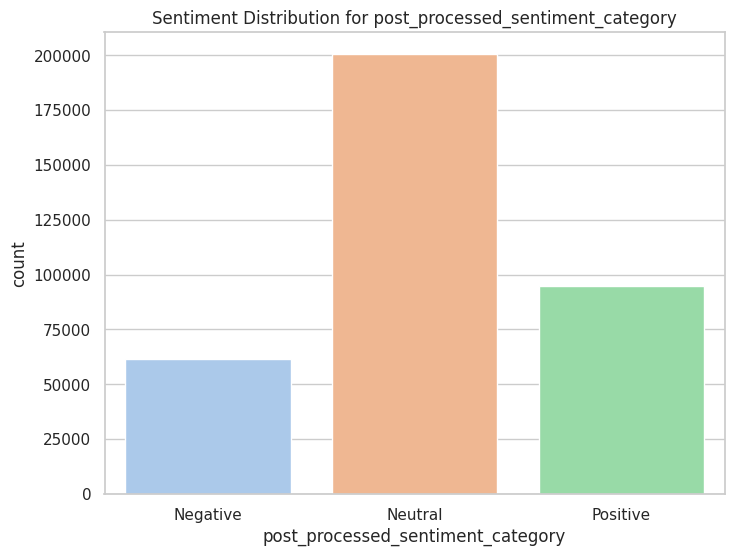

In [ ]:
!pip install seaborn
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

sentiment_category_columns = ['post_processed_sentiment_category']

for column in sentiment_category_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette="pastel", order=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Sentiment Distribution for {column}')
    plt.show()


In [ ]:

idf_counts = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
idf_keywords = ['idf']
for index, row in data.iterrows():
    text = row['post_processed']
    if any(keyword in text for keyword in idf_keywords):
        idf_counts[row['post_processed_sentiment_category']] += 1
print("IDF Counts:", idf_counts)

hamas_counts = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
hamas_keywords = ['hama']
for index, row in data.iterrows():
    text = row['post_processed']
    if any(keyword in text for keyword in hamas_keywords):
        hamas_counts[row['post_processed_sentiment_category']] += 1
print("Hamas Counts:", hamas_counts)





IDF Counts: {'Positive': 13454, 'Neutral': 1528, 'Negative': 9979}
Hamas Counts: {'Positive': 42924, 'Neutral': 3109, 'Negative': 29764}


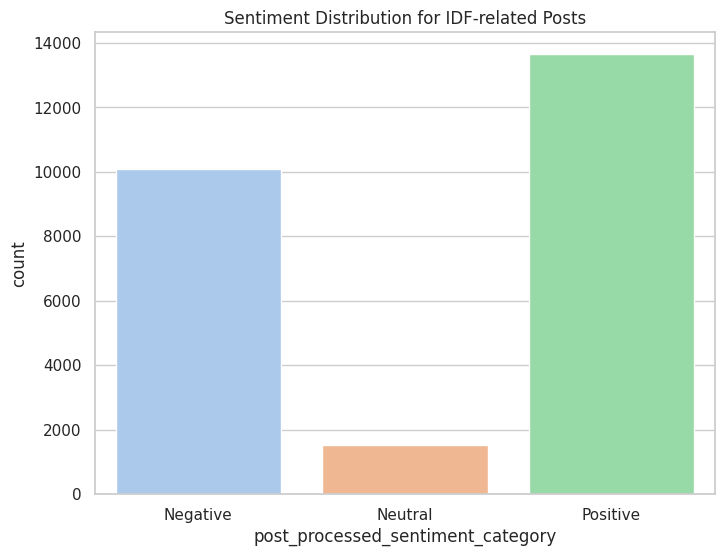

IDF Ratios:
Positive    0.540294
Negative    0.399224
Neutral     0.060481
Name: post_processed_sentiment_category, dtype: float64


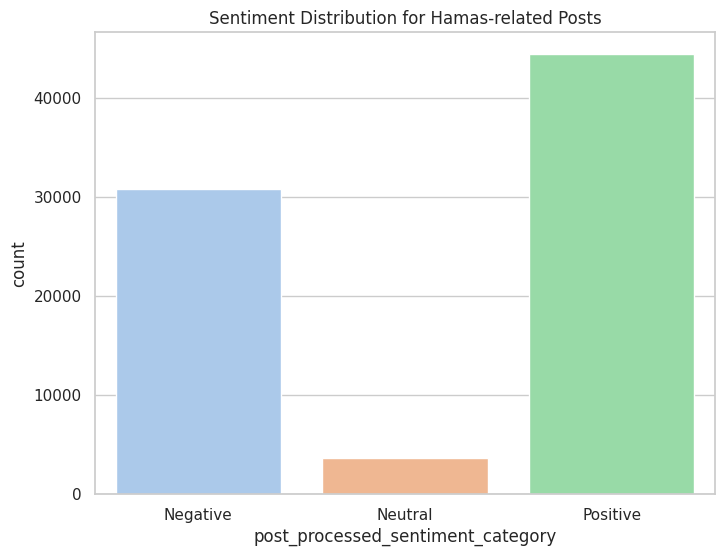

Hamas Ratios:
Positive    0.563745
Negative    0.390515
Neutral     0.045740
Name: post_processed_sentiment_category, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='post_processed_sentiment_category', data=data[data['post'].str.contains('idf', case=False)],
              palette="pastel", order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution for IDF-related Posts')
plt.show()

idf_total_posts = data[data['post'].str.contains('idf', case=False)].shape[0]
idf_ratios = data[data['post'].str.contains('idf', case=False)]['post_processed_sentiment_category'].value_counts() / idf_total_posts
print("IDF Ratios:")
print(idf_ratios)

plt.figure(figsize=(8, 6))
sns.countplot(x='post_processed_sentiment_category', data=data[data['post'].str.contains('hamas', case=False)],
              palette="pastel", order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution for Hamas-related Posts')
plt.show()

hamas_total_posts = data[data['post'].str.contains('hamas', case=False)].shape[0]
hamas_ratios = data[data['post'].str.contains('hamas', case=False)]['post_processed_sentiment_category'].value_counts() / hamas_total_posts
print("Hamas Ratios:")
print(hamas_ratios)


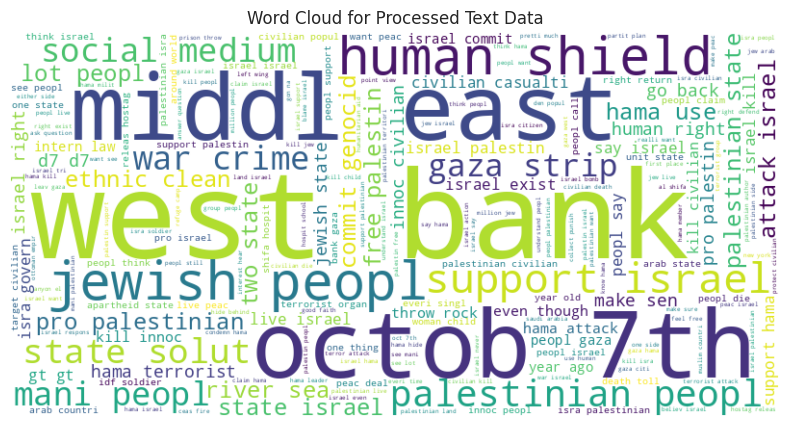

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(' '.join(words) for words in data['post_processed'])

exclude_words = ['amp', 'x200b']
filtered_text = ' '.join(word for word in all_text.split() if word.lower() not in exclude_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Processed Text Data')
plt.show()


In [ ]:
!pip install gensim
from gensim import corpora, models
from pprint import pprint

dictionary = corpora.Dictionary(data['post_processed'])
corpus = [dictionary.doc2bow(text) for text in data['post_processed']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
pprint(lda_model.print_topics(num_words=5))
data['dominant_topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(data[['post', 'dominant_topic']].head())


[(0,
  '0.033*"israel" + 0.027*"palestinian" + 0.015*"would" + 0.014*"gaza" + '
  '0.012*"isra"'),
 (1,
  '0.012*"kill" + 0.011*"hama" + 0.011*"one" + 0.011*"head" + 0.010*"peopl"'),
 (2,
  '0.038*"jew" + 0.019*"jewish" + 0.016*"palestin" + 0.016*"muslim" + '
  '0.016*"countri"'),
 (3,
  '0.033*"peopl" + 0.026*"israel" + 0.014*"like" + 0.014*"support" + '
  '0.014*"want"'),
 (4,
  '0.029*"http" + 0.026*"hama" + 0.019*"civilian" + 0.016*"gaza" + '
  '0.015*"assault"')]
                                                post  dominant_topic
0                                                                  0
1                                                                  0
2                                                                  0
3  So, it took two months but Hamas's sex crimes ...               3
4                                                                  0


In [ ]:
from gensim import models
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

documents = data['post_processed'].apply(lambda x: ' '.join(x)).tolist()
tokenized_docs = [word_tokenize(doc) for doc in documents]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics_and_words = {}
for topic_id, topic_words in lda_model.print_topics():
    topics_and_words[f'Topic {topic_id + 1}'] = [word.split('*')[1].strip() for word in topic_words.split('+')]



In [ ]:
pprint(topics_and_words)

{'Topic 1': ['"peopl"',
             '"see"',
             '"post"',
             '"like"',
             '"support"',
             '"one"',
             '"say"',
             '"man"',
             '"girl"',
             '"palestin"'],
 'Topic 2': ['"palestinian"',
             '"israel"',
             '"two"',
             '"state"',
             '"would"',
             '"isra"',
             '"train"',
             '"gaza"',
             '"peac"',
             '"govern"'],
 'Topic 3': ['"http"',
             '"hama"',
             '"assault"',
             '"gaza"',
             '"amp"',
             '"civilian"',
             '"use"',
             '"claim"',
             '"injuri"',
             '"motorcycl"'],
 'Topic 4': ['"israel"',
             '"hama"',
             '"peopl"',
             '"kill"',
             '"would"',
             '"war"',
             '"know"',
             '"happen"',
             '"civilian"',
             '"even"'],
 'Topic 5': ['"jew"',
             '"

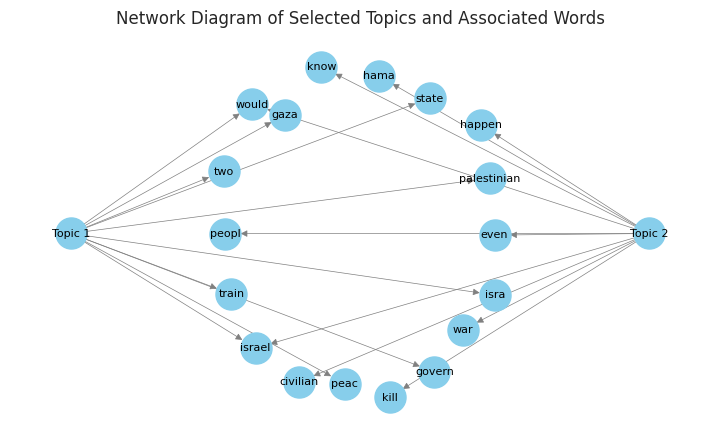

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
selected_topics_and_words = {
    'Topic 1': ['"palestinian"', '"israel"', '"two"', '"state"', '"would"', '"isra"', '"train"', '"gaza"', '"peac"', '"govern"'],
    'Topic 2': ['"israel"', '"hama"', '"peopl"', '"kill"', '"would"', '"war"', '"know"', '"happen"', '"civilian"', '"even"'],}
G = nx.DiGraph()
for topic, words in selected_topics_and_words.items():
    G.add_node(topic)
    for word in words:
        word = word.strip('"')
        G.add_node(word)
        G.add_edge(topic, word)
layout = {
    'Topic 1': [-2, 0],
    'Topic 2': [2, 0],}
for word in G.nodes:
    if word not in layout:
        layout[word] = layout.get(word, nx.spring_layout(G, seed=42, k=0.15))[word]
plt.figure(figsize=(7, 4))
nx.draw(G, pos=layout, with_labels=True, font_size=8, font_color='black', node_size=500, node_color='skyblue', edge_color='gray', width=0.5, arrows=True)
plt.title('Network Diagram of Selected Topics and Associated Words')
plt.show()
